Fashion MNIST 데이터 로드

In [1]:
import tensorflow as tf

In [2]:
(train_input, train_target), (test_input, test_target) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_input_scaled = train_input / 255.0

In [4]:
train_input_scaled.shape

(60000, 28, 28)

In [5]:
train_input_scaled = train_input_scaled.reshape(-1,28,28,1)

In [6]:
train_input_scaled.shape

(60000, 28, 28, 1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(train_input_scaled, train_target, test_size=0.2, random_state=0)

합성곱, 폴링층, 밀집층

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(2))

In [10]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

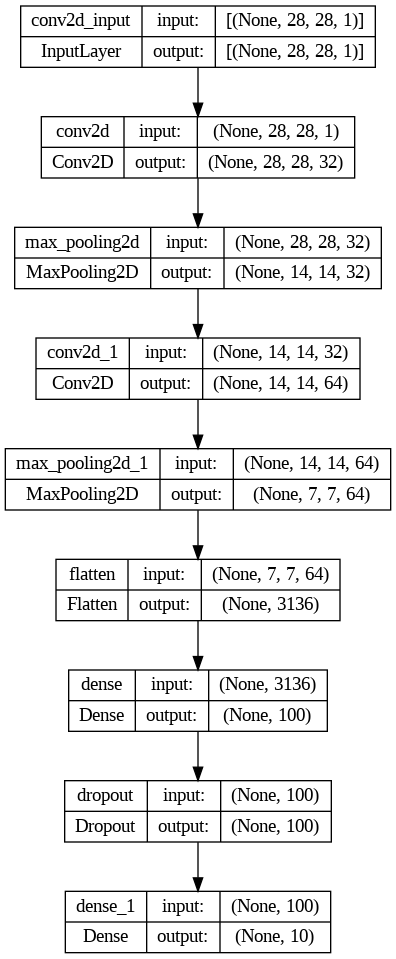

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [14]:
from keras import callbacks
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
hist = model.fit(x_train, y_train, epochs=20, batch_size=50, validation_data=(x_test, y_test), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
960/960 [==============================] - 14s 5ms/step - loss: 0.5112 - accuracy: 0.8165 - val_loss: 0.3279 - val_accuracy: 0.8820
Epoch 2/20
960/960 [==============================] - 5s 5ms/step - loss: 0.3299 - accuracy: 0.8813 - val_loss: 0.2871 - val_accuracy: 0.8967
Epoch 3/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2858 - accuracy: 0.8954 - val_loss: 0.2797 - val_accuracy: 0.8957
Epoch 4/20
960/960 [==============================] - 5s 5ms/step - loss: 0.2525 - accuracy: 0.9075 - val_loss: 0.2480 - val_accuracy: 0.9100
Epoch 5/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2279 - accuracy: 0.9167 - val_loss: 0.2310 - val_accuracy: 0.9176
Epoch 6/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2098 - accuracy: 0.9232 - val_loss: 0.2280 - val_accuracy: 0.9156
Epoch 7/20
960/960 [==============================] - 5s 5ms/step - loss: 0.1922 - accuracy: 0.9292 - val_loss: 0.2200 - val_accuracy: 0.9187
Epoch

In [15]:
import matplotlib.pyplot as plt

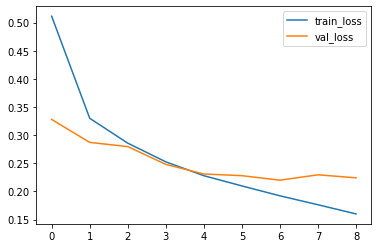

In [16]:
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

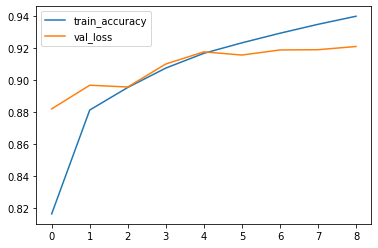

In [17]:
plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label='val_loss')
plt.legend()

In [18]:
test_input.shape

(10000, 28, 28)

In [19]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 31.4723 - accuracy: 0.8957


[31.472314834594727, 0.8956999778747559]

In [20]:
plt.imshow(test_input_scaled[0], cmap='gray_r')

NameError: ignored

In [ ]:
model.predict(test_input_scaled[0].reshape(28,28,1))

In [21]:
x_train.shape

(48000, 28, 28, 1)

In [ ]:
preds = model.predict(test_input_scaled[0].reshape(1,28,28,1))
preds

In [ ]:
plt.bar(range(1,len(preds[0])+1), preds[0])

In [22]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


In [23]:
train_x.shape

(50000, 32, 32, 3)

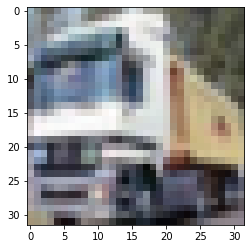

In [24]:
plt.imshow(train_x[1])

In [25]:
np.unique(train_y)

NameError: ignored

In [28]:
train_x_scaled = train_x / 255.0
x_train, x_test, y_train, y_test = train_test_split(train_x_scaled, train_y, test_size=0.2, random_state=0)

In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,3,padding='same',activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics='accuracy')
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
hist = model.fit(x_train, y_train, epochs=20, batch_size=50, validation_data=(x_test, y_test), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
800/800 [==============================] - 6s 6ms/step - loss: 1.6099 - accuracy: 0.4156 - val_loss: 1.3549 - val_accuracy: 0.5168
Epoch 2/20
800/800 [==============================] - 4s 5ms/step - loss: 1.2622 - accuracy: 0.5476 - val_loss: 1.1426 - val_accuracy: 0.6029
Epoch 3/20
800/800 [==============================] - 4s 5ms/step - loss: 1.1140 - accuracy: 0.6060 - val_loss: 1.0565 - val_accuracy: 0.6334
Epoch 4/20
800/800 [==============================] - 4s 5ms/step - loss: 1.0153 - accuracy: 0.6425 - val_loss: 0.9391 - val_accuracy: 0.6687
Epoch 5/20
800/800 [==============================] - 4s 4ms/step - loss: 0.9371 - accuracy: 0.6702 - val_loss: 0.9508 - val_accuracy: 0.6674
Epoch 6/20
800/800 [==============================] - 4s 5ms/step - loss: 0.8812 - accuracy: 0.6867 - val_loss: 0.8765 - val_accuracy: 0.6923
Epoch 7/20
800/800 [==============================] - 4s 5ms/step - loss: 0.8184 - accuracy: 0.7104 - val_loss: 0.8841 - val_accuracy: 0.6922
Epoch 